In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hechos = pd.read_csv('./datos modificados/Tabla_de_hechos_final.csv', index_col=False)
hechos['RecaudoxTrafico'] = hechos['Recaudo'] * hechos[ 'Trafico']

evaluated_col = 'Recaudo'

peajes = pd.read_csv('datos originales/peajes.csv', index_col=False)
print('Dimensiones hechos', peajes.shape)
hechos.head()

Dimensiones hechos (90, 20)


,NombreEstacionPeaje,Recaudo,Trafico,Cod_fecha,RecaudoxTrafico
0,ACAPULCO,0.0,0.0,2014_01,0.0
1,ACAPULCO,0.0,0.0,2014_02,0.0
2,ACAPULCO,0.0,0.0,2014_03,0.0
3,ACAPULCO,0.0,0.0,2014_04,0.0
4,ACAPULCO,0.0,0.0,2014_05,0.0


### Crear hechos sin inosistencias con peajes

In [3]:
iterable_peaje = peajes['nombre']

hechos = hechos.loc[hechos['NombreEstacionPeaje'].isin(iterable_peaje)]

print('Dimensiones hechos', peajes.shape)
hechos.tail()

Dimensiones hechos (90, 20)


,NombreEstacionPeaje,Recaudo,Trafico,Cod_fecha,RecaudoxTrafico
7015,VILLARICA,3.632113e+09,0.0,2018_08,0.0
7016,VILLARICA,3.472157e+09,0.0,2018_09,0.0
7017,VILLARICA,3.658233e+09,0.0,2018_10,0.0
7018,VILLARICA,0.000000e+00,0.0,2018_11,0.0
7019,VILLARICA,0.000000e+00,0.0,2018_12,0.0


### Join de hechos con peajes para incluir Departamento

In [4]:
hechos = hechos.join(other=peajes.set_index('nombre'),
            on='NombreEstacionPeaje')[[
    'NombreEstacionPeaje',
    'Trafico',
    'Cod_fecha', 'departamento', evaluated_col]].reset_index(drop=True)

hechos.head()

,NombreEstacionPeaje,Trafico,Cod_fecha,departamento,Recaudo
0,ACAPULCO,0.0,2014_01,Caldas,0.0
1,ACAPULCO,0.0,2014_02,Caldas,0.0
2,ACAPULCO,0.0,2014_03,Caldas,0.0
3,ACAPULCO,0.0,2014_04,Caldas,0.0
4,ACAPULCO,0.0,2014_05,Caldas,0.0


### Remoción de vacíos e inicialización de dict de frecuencias de dígitos en recaudos por dpto

El atributo 'freq' de cda dato del Dict de frecuencias tiene un arreglo de tamaño 9 donde
en la posición i está la información de frecuencias del dígito i+1.

In [5]:
column_name = 'departamento'
# peajes = pd.DataFrame(hechos['NombreEstacionPeaje'].drop_duplicates())
# peajes.to_dict()
filter = hechos[evaluated_col] != ''
hechos = hechos.dropna(subset=[evaluated_col])
# hechos = hechos[filter]

record = pd.DataFrame( hechos.drop_duplicates(subset=[column_name], ignore_index=True)[column_name]).to_dict(orient='records')

frecuenciasAbsolutas = {nombre[column_name]: {'freqs': [0 for i in range(9)], 'total': 0} for nombre in record}
frecuenciasAbsolutas

{'Caldas': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Santander': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Cundinamarca': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Huila': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'La Guajira': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Tolima': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Antioquia': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Bolivar': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Sucre': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Narino': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Meta': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Valle del Cauca': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Risaralda': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Quindio': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Cesar': {'freqs': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'total': 0},
 'Magdalena': {'freqs': [0, 0,

In [6]:
def getFirstDigit(n):
    # n = n if n else 0
    d = int(str(n)[0:1])
    return d

count = 0
for index, row in hechos.iterrows():
    nombre, value = row[column_name], row[evaluated_col]
    # count+=1
    # print(count, recaudo)
    digit = getFirstDigit(value)

    if digit != 0:
        frecuenciasAbsolutas[nombre]['freqs'][digit-1] += 1
        frecuenciasAbsolutas[nombre]['total'] += 1
    # if not count:
    #     break

frecuenciasAbsolutas

{'Caldas': {'freqs': [118, 2, 0, 0, 9, 12, 11, 4, 2], 'total': 158},
 'Santander': {'freqs': [176, 78, 3, 0, 0, 1, 0, 1, 12], 'total': 271},
 'Cundinamarca': {'freqs': [8, 72, 91, 127, 102, 33, 1, 0, 0], 'total': 434},
 'Huila': {'freqs': [45, 0, 1, 0, 0, 0, 6, 15, 13], 'total': 80},
 'La Guajira': {'freqs': [50, 7, 3, 21, 18, 27, 28, 27, 30], 'total': 211},
 'Tolima': {'freqs': [58, 22, 31, 47, 34, 10, 0, 0, 0], 'total': 202},
 'Antioquia': {'freqs': [145, 104, 40, 49, 22, 18, 16, 11, 10], 'total': 415},
 'Bolivar': {'freqs': [258, 26, 1, 1, 0, 0, 8, 27, 23], 'total': 344},
 'Sucre': {'freqs': [48, 43, 5, 17, 3, 10, 4, 3, 14], 'total': 147},
 'Narino': {'freqs': [6, 9, 1, 0, 0, 1, 7, 7, 1], 'total': 32},
 'Meta': {'freqs': [5, 1, 6, 19, 4, 30, 21, 6, 1], 'total': 93},
 'Valle del Cauca': {'freqs': [82, 132, 135, 20, 1, 3, 10, 12, 13],
  'total': 408},
 'Risaralda': {'freqs': [0, 38, 41, 36, 5, 0, 0, 0, 0], 'total': 120},
 'Quindio': {'freqs': [0, 27, 30, 3, 0, 0, 0, 0, 0], 'total': 60

In [7]:
def getFreq(freq, total):
    return freq/total if total != 0 else 0
frecuencias_porcentuales = {key: {
    'freqs':
        [getFreq(freq,
             frecuenciasAbsolutas[key]['total'])
         for freq in frecuenciasAbsolutas[key]['freqs']
         ],
    'total': frecuenciasAbsolutas[key]['total']
}
    for key in frecuenciasAbsolutas.keys()}

frecuencias_porcentuales

{'Caldas': {'freqs': [0.7468354430379747,
   0.012658227848101266,
   0.0,
   0.0,
   0.056962025316455694,
   0.0759493670886076,
   0.06962025316455696,
   0.02531645569620253,
   0.012658227848101266],
  'total': 158},
 'Santander': {'freqs': [0.6494464944649446,
   0.2878228782287823,
   0.01107011070110701,
   0.0,
   0.0,
   0.0036900369003690036,
   0.0,
   0.0036900369003690036,
   0.04428044280442804],
  'total': 271},
 'Cundinamarca': {'freqs': [0.018433179723502304,
   0.16589861751152074,
   0.20967741935483872,
   0.2926267281105991,
   0.2350230414746544,
   0.07603686635944701,
   0.002304147465437788,
   0.0,
   0.0],
  'total': 434},
 'Huila': {'freqs': [0.5625,
   0.0,
   0.0125,
   0.0,
   0.0,
   0.0,
   0.075,
   0.1875,
   0.1625],
  'total': 80},
 'La Guajira': {'freqs': [0.23696682464454977,
   0.03317535545023697,
   0.014218009478672985,
   0.0995260663507109,
   0.08530805687203792,
   0.12796208530805686,
   0.13270142180094788,
   0.12796208530805686,
   0.

## Graficar un dato

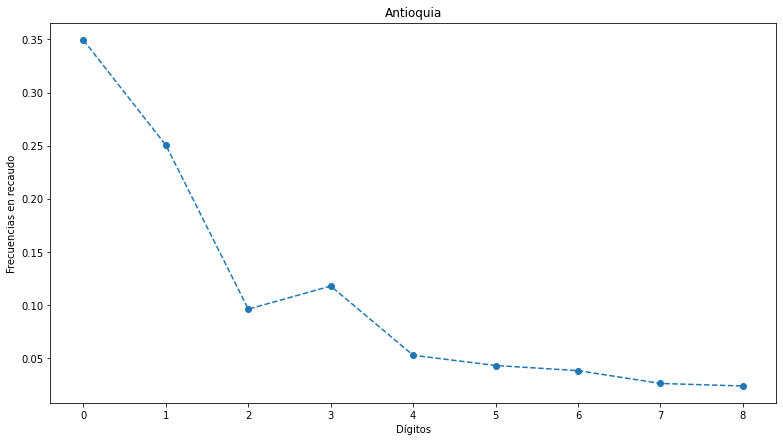

In [8]:
# Colocar aquí la posición en el dict de las frecuencias a graficar
n = 6

datos = list(frecuencias_porcentuales.items())[n][1]['freqs']
name = list(frecuencias_porcentuales.items())[n][0]

plt.rcParams["figure.figsize"] = (13,7)
plt.plot(datos, linestyle='--', marker='o')
plt.title(name)
plt.xlabel('Dígitos')
plt.ylabel('Frecuencias en recaudo')
plt.show()

### Análisis con errores cuadráticos
Se calcula el error de un dígito $d\in \{1,\ldots,9\}$ con frecuencia $x_d$ con respecto a los valores esperados $\mu_d$ y se incluye únicamente si la frecuencia es mayor ($x_d > \mu_d)$, pues se interpreta una menor frecuencia como el consecuente resultado de lo anterior. Así, el análisis se hará con respecto a la desviación estándar: $$\sigma = \sqrt{\sum(x_d-\mu_d)^2/9}$$ Y comparando con los errores: $$\delta_d = ||x_d -\mu_d||$$ Esto, si y sólo si: $$x_d > \mu_d$$ Se considera que hay un flag si $\delta_d > \sigma$.

In [9]:
hechos = pd.read_csv('./datos modificados/Tabla_de_hechos_final.csv', index_col=False)
recaudo = hechos['Recaudo']

# Valores esperados según la ley de Benford
expected_values = []
for i in range(1, 10):
        d = np.log10((i+1)/i)
        expected_values.append(d)

# Para calcular el porcentaje de flags
total_flags = 0

dpto_flags = []
x = list(frecuencias_porcentuales.items())
for i in x:
    # Cada i representa un peaje
    freqs = i[1]['freqs']
    # Se calcula sigma y delta_d
    sigma = 0
    delta_d = [0]*len(expected_values)
    for j in range(0,len(expected_values)):
        delta_d[j] = freqs[j]-expected_values[j]
        sigma += np.power(delta_d[j],2)
        
    sigma = np.sqrt(sigma/len(expected_values))
    # Se mira los dígitos para los que vale x_d-expected_values > 0
    counter = 0
    hasFlag = False
    for j in range(0,len(expected_values)):
        if freqs[j] > expected_values[j]:
            if delta_d[j] > 0.9*sigma:
                counter += 1
                if counter > 2 and not hasFlag:
                    total_flags += 1
                    hasFlag = True
    if hasFlag:
        dpto_flags.append([i[0], 1])
    else:
        dpto_flags.append([i[0], 0])

print(f'Porcentaje de flags {np.round(total_flags/len(x)*100, 2)}%')
pd.DataFrame(dpto_flags, columns=['Departamento', 'Flag']).to_csv("datos modificados/departamento_flags.csv")

Porcentaje de flags 14.29%


In [10]:
recaudo = hechos['Recaudo']
# Cálculo de frecuencias por dígito
fd_freq = {}
for i in range(1,10):
    fd_freq[i] = 0
counter = 0
for val in recaudo:
    if val > 0:
        counter += 1
        fd_freq[int(str(val)[:1])] += 1
# Cálculo porcentual de las frecuencias
fd_freq_values = fd_freq.copy()
for i in range(1,10):
    fd_freq[i] /= counter

# Se calcula sigma y delta_d
sigma = 0
delta_d = [0]*len(expected_values)
for j in range(0,len(expected_values)):
    sigma += np.power(fd_freq[j+1]-expected_values[j], 2)
    delta_d[j] = fd_freq[j+1]-expected_values[j]
sigma = np.sqrt(sigma/len(expected_values))

# Se mira los dígitos para los que vale x_d-expected_values > 0
num_peajes_flag = 0
flaged_digits = []
for j in range(0,len(expected_values)):
    if fd_freq[j+1] > expected_values[j]:
        if delta_d[j] > 1.5*sigma:
            num_peajes_flag += fd_freq_values[j+1]
            flaged_digits.append(j+1)

x = []
for val in recaudo:
    if val > 0:
        found = False
        for d in flaged_digits:
            if int(str(val)[:1]) == d:
                x.append(1)
                found = True
                break
        if not found:
            x.append(0)
    else:
        x.append(0)

hechos['Flag'] = x
hechos.to_csv("datos modificados/Tabla_de_hechos_final_flags.csv")
print(f"El porcentaje de peajes con flags es {round(num_peajes_flag*100/counter,2)}% ({num_peajes_flag} peajes.)")

El porcentaje de peajes con flags es 23.64% (1246 peajes.)
